## Import libraries and have a look at data

In [208]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

train_data = pd.read_csv('train.csv')
train_data.head()

test_data = pd.read_csv('test.csv')

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Information on variables
- passenger ID 
- survival - 0/1 binary
- pclass - ticket class - 1st, 2nd, 3rd
- name
- sex
- age
- sibsp - no of siblings/spouses aboard titanic - did not consider mistress/fiance 
- parch - no of parents/children aboard titanic
- ticket 
- fare
- cabin
- embarked - where they embarked - C = Cherbourg, Q = Queenstown, S  = Southampton

# EDA 

In [56]:
## check for any missing values
train_data.isnull().sum()

## we have 177 instances with no age 
## we have 2 missing values in Embarked
## no missing values in Pclass, sex, survived

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# M/F and age

### M/F passengers piechart

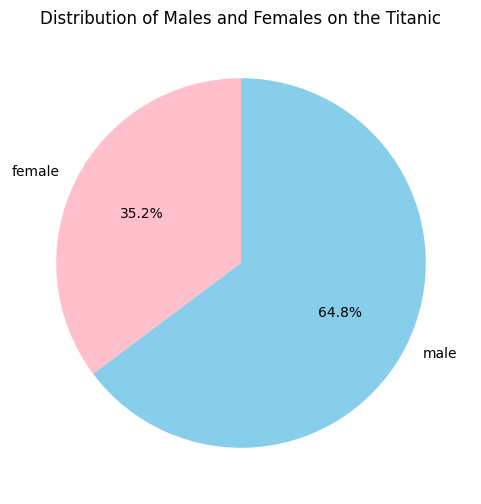

In [107]:
## I also want to compare how many M/F we have
total_by_gender = train_data.groupby(['Sex']).size().reset_index(name='total_gender_counts')

## 314F and 577M 

# Create a pie chart for the total counts of males and females
plt.figure(figsize=(6, 6))
plt.pie(total_by_gender['total_gender_counts'], labels=total_by_gender['Sex'], autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
plt.title('Distribution of Males and Females on the Titanic')
plt.show()

## we can see there are more male passengers than female, which could skew some of our visualisations/calculations later 

### ax - M/F Survivors Bar Plot

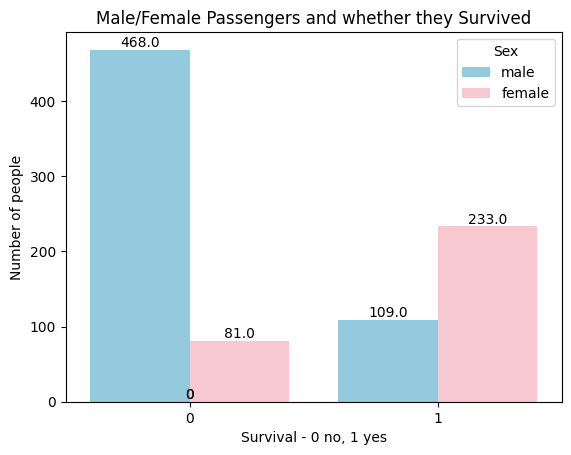

In [106]:
## let's explore the relationship between some variables
## I want to see how many M vs F survived

## Set the palette with custom colors
custom_palette = ['skyblue', 'pink']
sns.set_palette(custom_palette)

ax = sns.countplot(x='Survived', hue='Sex', data=train_data)

plt.title('Male/Female Passengers and whether they Survived')
plt.xlabel('Survival - 0 no, 1 yes')
plt.ylabel('Number of people')

## add counts to top of bar plots
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.show()

### ax1 - M/F Passengers by Age Group

C:\Users\irina\AppData\Local\Temp\ipykernel_15920\165019957.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(-1, inplace=True)


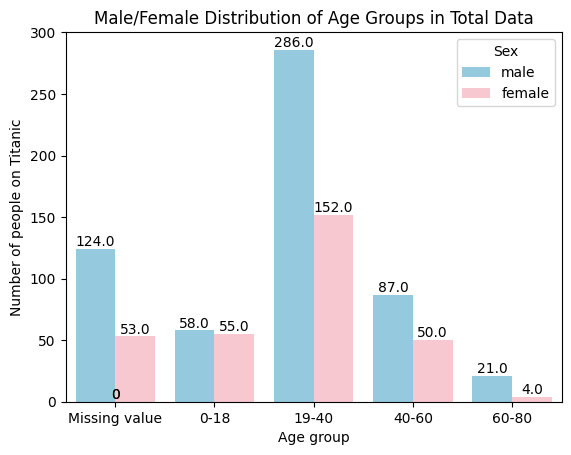

In [105]:
## so it looks like 233F and 109M survived
## let's introduce age and look at M/F, survival or not

## let's look at how many M/F per age group are in the total data 

## fill in missing values with -1 
train_data['Age'].fillna(-1, inplace=True)

## define age bins and labels 
age_bins = [-2, 0, 18, 40, 60, 80]
labels = ['Missing value', '0-18', '19-40', '40-60', '60-80']

## make new column with age_bins
train_data['age_group'] = pd.cut(train_data['Age'], bins=age_bins, labels=labels, right=False)

## count people in each age group and missing values
total_age_group_counts = train_data['age_group'].value_counts().sort_index()

## Set the palette with custom colors
custom_palette = ['skyblue', 'pink']
sns.set_palette(custom_palette)

## create a countplot according to gender and age group
ax1 = sns.countplot(x='age_group', hue='Sex', data=train_data)

plt.title('Male/Female Distribution of Age Groups in Total Data')
plt.xlabel('Age group')
plt.ylabel('Number of people on Titanic')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [67]:
## we can see we have a total of 178 missing age values out of a total of 891 values
percentage_missing_values = 178/891 * 100 ## about 20% 
percentage_missing_values

19.977553310886645

### ax2 - Survivors by Age Group

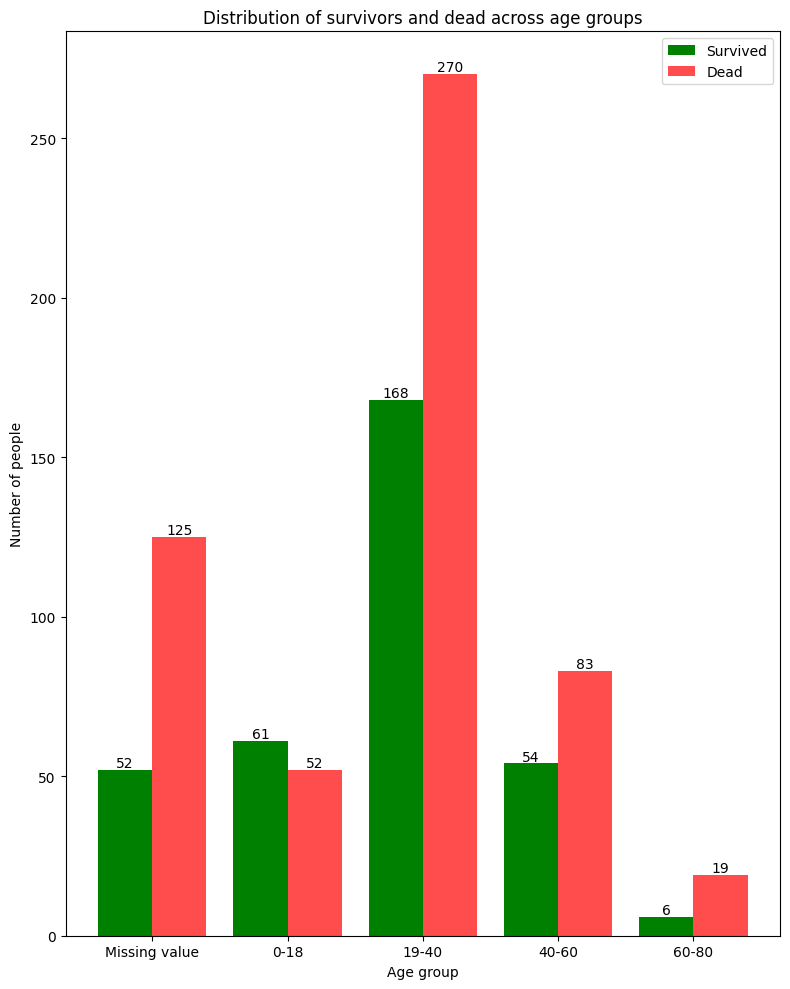

In [89]:
# let's just look at survivors now - how many per age group?

## select for people that have survived - need to make a copy otherwise it starts messing about
survived_data = train_data[train_data['Survived'] == 1].copy()
unalive_data = train_data[train_data['Survived'] == 0].copy()

## create new column with age bins
survived_data['age_group'] = pd.cut(survived_data['Age'], bins=age_bins, labels=labels, right=False)
unalive_data['age_group'] = pd.cut(unalive_data['Age'], bins=age_bins, labels=labels, right=False)

## count each age group
survived_age_group_counts = survived_data['age_group'].value_counts().sort_index()
unalive_age_group_counts = unalive_data['age_group'].value_counts().sort_index()

## do bar chart with this new info
fig, ax2 = plt.subplots(figsize=(8, 10))

# Bar chart of survivors
ax2.bar(survived_age_group_counts.index.codes, survived_age_group_counts, width=0.4, color='green', label='Survived')

# Bar chart of dead
ax2.bar(unalive_age_group_counts.index.codes + 0.4, unalive_age_group_counts, width=0.4, color='red', label='Dead', alpha=0.7)

ax2.set_xlabel('Age group')
ax2.set_ylabel('Number of people')
ax2.set_title('Distribution of survivors and dead across age groups')

# Add counts to bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set xticks and xticklabels
ax2.set_xticks(np.arange(len(survived_age_group_counts)) + 0.2)
ax2.set_xticklabels(survived_age_group_counts.index)

# Set legend
ax2.legend()

plt.tight_layout()
plt.show()

### ax3 - M/F Piechart of Survivors by Age Group

C:\Users\irina\AppData\Local\Temp\ipykernel_15920\2690085395.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_age_gender = train_data.groupby(['age_group', 'Sex']).size().reset_index(name='total_counts')
C:\Users\irina\AppData\Local\Temp\ipykernel_15920\2690085395.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_by_age_gender = train_data[train_data['Survived'] == 1].groupby(['age_group', 'Sex']).size().reset_index(name='survived_counts')


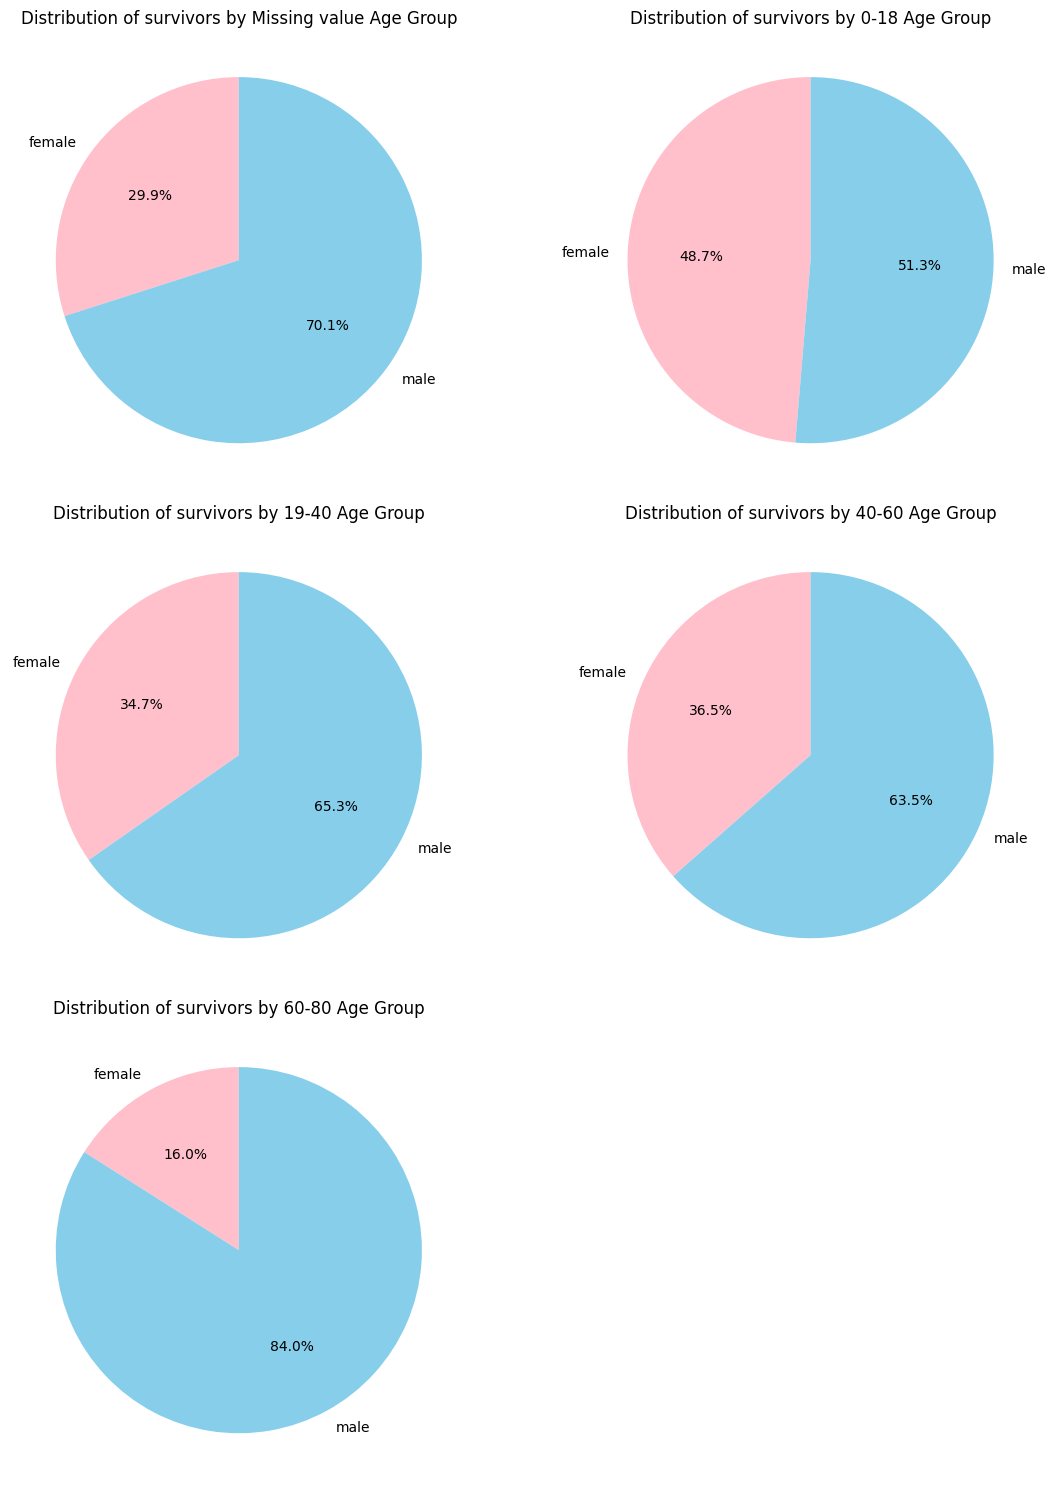

In [104]:
## now let's count survivors by M/F age vs dead by M/F age


## count per age group and gender - makes a df with 3 columns: age, sex, total counts
total_by_age_gender = train_data.groupby(['age_group', 'Sex']).size().reset_index(name='total_counts')

## count survivors by age and gender 
survivors_by_age_gender = train_data[train_data['Survived'] == 1].groupby(['age_group', 'Sex']).size().reset_index(name='survived_counts')

## merge data 
merged_data = pd.merge(total_by_age_gender, survivors_by_age_gender, on=['age_group', 'Sex'], how='left', suffixes=('_total', '_survived'))

## calculate % of survivors
merged_data['percentage_survived'] = ((merged_data['survived_counts'] / merged_data['total_counts']) * 100).round(1)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

for i, age_group in enumerate(labels):
    ax3 = axes[i // 2, i % 2]
    age_group_data = merged_data[merged_data['age_group'] == age_group]
    ax3.pie(age_group_data['total_counts'], labels=age_group_data['Sex'], autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
    ax3.set_title(f'Distribution of survivors by {age_group} Age Group')

## remove extra plot in row 3, col 2
fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

# Class

## Pie chart by Class

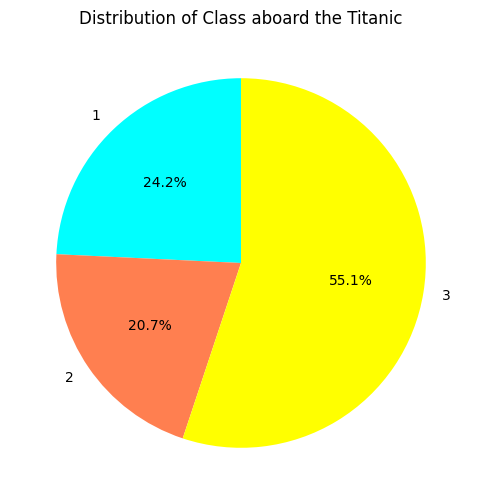

In [133]:
## Let's start looking at socio-economic status and how this relates to survival

total_by_class = train_data.groupby(['Pclass']).size().reset_index(name='total_class_counts')


plt.figure(figsize=(6, 6))
plt.pie(total_by_class['total_class_counts'], labels=total_by_class['Pclass'], autopct='%1.1f%%', startangle=90, colors=['cyan', 'coral', 'yellow'])
plt.title('Distribution of Class aboard the Titanic')
plt.show()


## ax4 - Bar chart Survival by Class

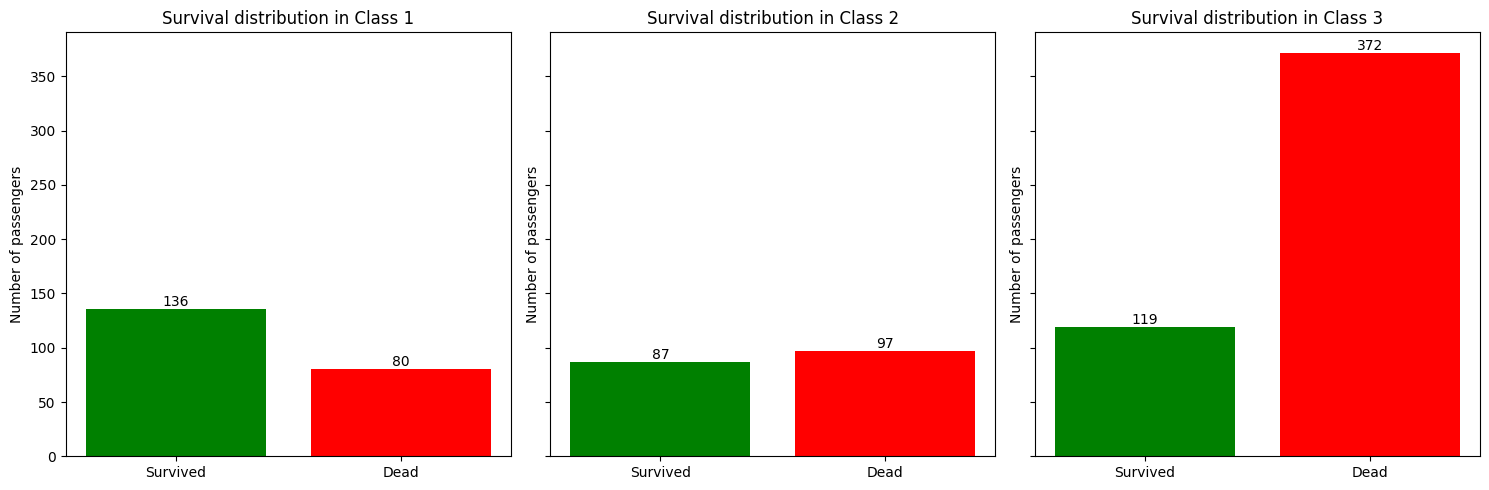

In [145]:
## Now let's see how much of each class survived

survivors_by_class = train_data[train_data['Survived'] == 1].groupby(['Pclass']).size().reset_index(name='survived_class_counts')

## merge data
total_and_survivors_class = pd.merge(total_by_class, survivors_by_class, on=['Pclass'], how='left', suffixes=('_total', '_survived'))

## calculate number of dead 
total_and_survivors_class['dead_class_counts'] = total_and_survivors_class['total_class_counts'] - total_and_survivors_class['survived_class_counts']



fig, axes4 = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Loop through each class
for i, cabin_class in enumerate([1, 2, 3]):
    ax4 = axes4[i]
    cabin_class_data = total_and_survivors_class[total_and_survivors_class['Pclass'] == cabin_class]
    
    # Plot bar chart
    bars = ax4.bar(['Survived', 'Dead'], [cabin_class_data['survived_class_counts'].values[0], cabin_class_data['dead_class_counts'].values[0]], color=['green', 'red'])
    
    # Add data labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
    
    ax4.set_title(f'Survival distribution in Class {cabin_class}')
    ax4.set_ylabel('Number of passengers')

plt.tight_layout()
plt.show()


## ax5 - Pie charts with survival by class

In [150]:
total_and_survivors_class

,Pclass,total_class_counts,survived_class_counts,dead_class_counts,percentage_survived
0,1,216,136,80,63.0
1,2,184,87,97,47.3
2,3,491,119,372,24.2


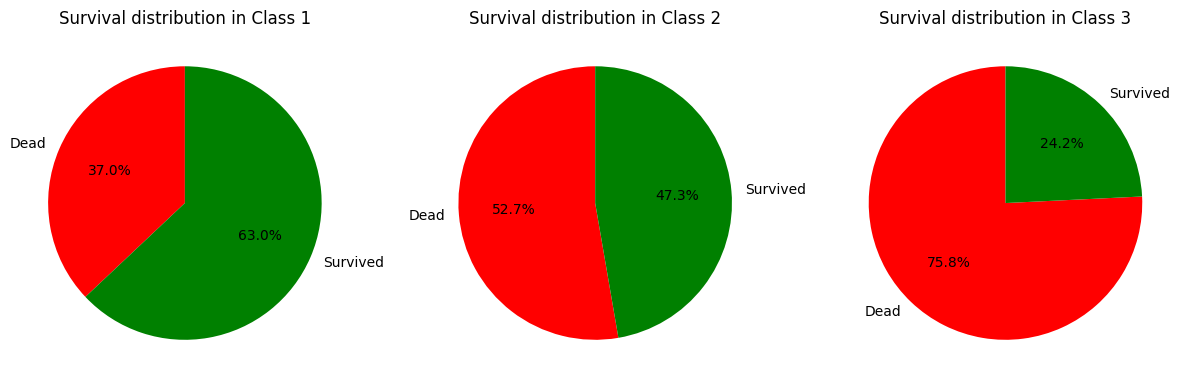

In [153]:
## create column with percentage 
total_and_survivors_class['percentage_survived'] = ((total_and_survivors_class['survived_class_counts'] / total_and_survivors_class['total_class_counts']) * 100).round(1)


# Create subplots
fig, axes5 = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through each class
for i, cabin_class in enumerate([1, 2, 3]):
    ax5 = axes5[i]

    # Plot pie chart
    ax5.pie(total_and_survivors_class.loc[total_and_survivors_class['Pclass'] == cabin_class, ['dead_class_counts', 'survived_class_counts']].values[0], labels=['Dead', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    ax5.set_title(f'Survival distribution in Class {cabin_class}')

plt.show()


## Boxplot with Fare vs Class

In [182]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,19-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,19-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,19-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,19-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,19-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,19-40
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19-40
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,S,Missing value
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,19-40


# Why did Anna Ward pay $500 for her ticket???

## Find Anna's ticket details which is absolutely throwing off my beautiful boxplot

She embarked at Cherbourg (not even the first location!)

In [186]:
# Find the maximum 'Fare' value
max_fare_value = train_data['Fare'].max()

# Use boolean indexing to get all rows with the maximum 'Fare' value
rows_with_max_fare = train_data[train_data['Fare'] == max_fare_value]

# Display all rows
print(rows_with_max_fare)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   

    age_group  
258     19-40  
679     19-40  
737     19-40  


## So it's not ANNA that is the issue, but rather Mr Cardeza, his dependent (Parch 1), Mr Lesurer (who app works for Mr Cardeza and ALSO it is written Mr Cardeza's wife came on board too so why isn't she in the data??), Miss Ward (apparently his maid) ALL have the exact same fare - COINCIDENCE???? I think Mr Cardeza paid for everyone but then having the value written down next to each person can be misleading!!

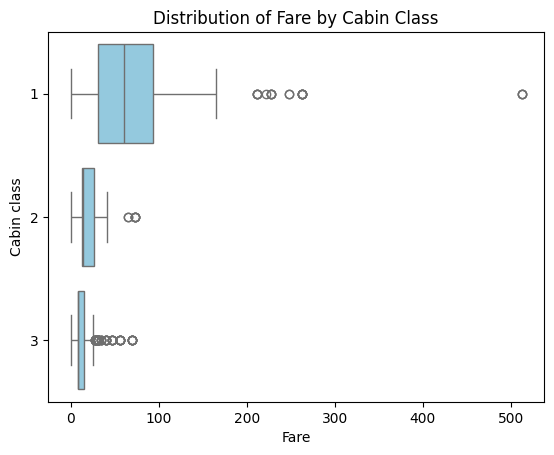

In [196]:
## here you can see how Mr Cardeza and his lot are throwing off my beautiful boxplot

## this plot is born from me wondering why the correlation between class and fare is only -0.55 
## hence, we are gonna do a box plot of fare vs Pclass

sns.boxplot(y='Pclass', x='Fare', data=train_data, orient='h')

plt.title('Distribution of Fare by Cabin Class')
plt.xlabel('Fare')
plt.ylabel('Cabin class')

plt.show()

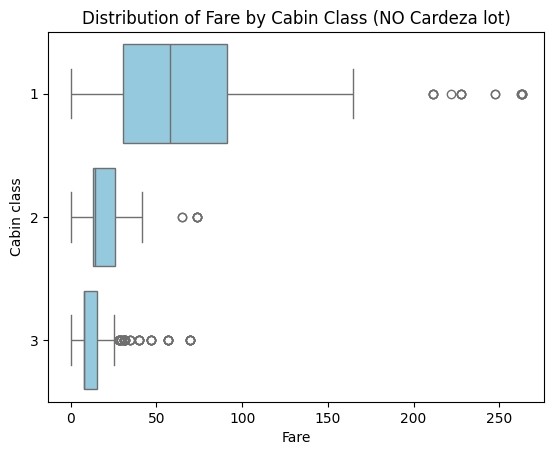

In [197]:
## slightly better though not the best - turned horizontally thx for the tip Matt
train_no_cardeza = train_data.drop(rows_with_max_fare.index)

sns.boxplot(y='Pclass', x='Fare', data=train_no_cardeza, orient='h')

plt.title('Distribution of Fare by Cabin Class (NO Cardeza lot)')
plt.xlabel('Fare')
plt.ylabel('Cabin class')

plt.show()

## BUT!!!! WHY are all the boxplots going down to 0? Clearly there are passengers that paid $0! Why? How???

BEHOLD SHERLOCK IN ACTION
- Mr Cardeza has clearly paid $512 for 4+ people (otherwise the value does not make sense, given they left from the second location rather than the beginning and in comparison to everyone else), yet $512 is written next to each of these passengers - does this mean we have $512 x 4 or that we get the fare value written next to each? 
- 15 people have $0 fare - stowaways? given some are Class 1, that does not make sense; they also have ticket numbers! illegal stowaways don't get tickets 
- Inconsistency in recording the data seems most likely, thus making Fare an unreliable value 
- 8 of the 15 passengers with fare zero also have no age data - perhaps related to this as well?


In [201]:
## 15 passengers with fare ZERO - 8 of which don't have age data 
zero_fare_rows = train_data[train_data['Fare'] == 0]
zero_fare_rows



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,19-40
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,40-60
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,19-40
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,-1.0,0,0,239853,0.0,NaN,S,Missing value
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,19-40
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,-1.0,0,0,239853,0.0,NaN,S,Missing value
466,467,0,2,"Campbell, Mr. William",male,-1.0,0,0,239853,0.0,NaN,S,Missing value
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,-1.0,0,0,239854,0.0,NaN,S,Missing value
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,40-60
633,634,0,1,"Parr, Mr. William Henry Marsh",male,-1.0,0,0,112052,0.0,NaN,S,Missing value


## What if we take away all the zero-fare rows?

In [205]:
train_no_zeros.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,444.402062,0.387171,2.319588,23.693207,0.533792,0.388316,31.107631
std,257.858537,0.487382,0.833526,17.833717,1.111477,0.812291,41.331513
min,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,4.012500
25%,220.000000,0.000000,2.000000,7.000000,0.000000,0.000000,7.925000
50%,444.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.500000
75%,666.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


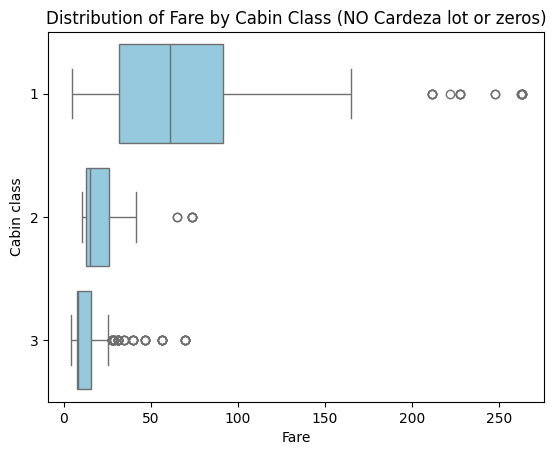

In [206]:
train_no_zeros = train_no_cardeza.drop(zero_fare_rows.index)

## Let's try again
sns.boxplot(y='Pclass', x='Fare', data=train_no_zeros, orient='h')

plt.title('Distribution of Fare by Cabin Class (NO Cardeza lot or zeros)')
plt.xlabel('Fare')
plt.ylabel('Cabin class')

plt.show()

## we still have very small values so I don't think it made much of a difference - $4 versus $0 is not that far off in the grand scheme of a $500 axis 

## That was disappointing. But! We now know fare is not reliably encoded. This may mean other columns are not as reliable either. Let's continue.

# Class and Embarked?

## ax6 - Bar plot showing where passengers embarked

C:\Users\irina\AppData\Local\Temp\ipykernel_15920\1873054434.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax6 = sns.barplot(x=embarked_counts.index, y=embarked_counts.values, palette='viridis')


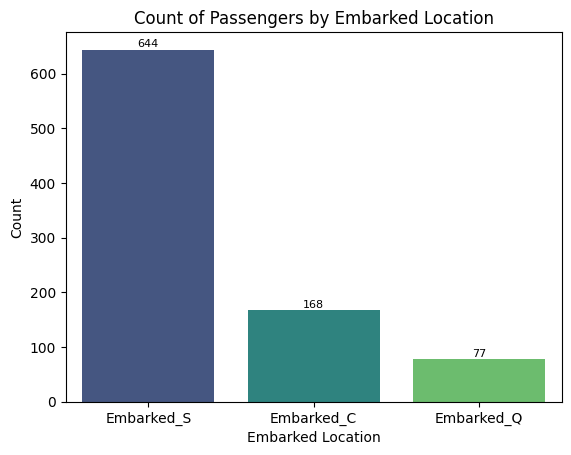

In [213]:
## Maybe this is because it depends on where the passengers embarked? We know there are 3 places - C = Cherbourg FR, Q = Queenstown Ireland, S  = Southampton UK
# S-C is 136.8 km
# C-Q 439.6km (actual route would be longer as needs to go around bottom of UK)

# drop missing values from embarked - only 2 rows so not too bad
train_data_clean_embark = train_data.dropna(subset=['Embarked'])

# use one-hot encoding on data 
train_data_embark_encoded = pd.get_dummies(train_data_clean_embark, columns=['Embarked'], prefix='Embarked')

# I want a barplot comparing number of people that embarked at each place
embarked_counts = train_data_embark_encoded[['Embarked_S', 'Embarked_C', 'Embarked_Q']].sum()

# Plotting the countplot
ax6 = sns.barplot(x=embarked_counts.index, y=embarked_counts.values, palette='viridis')
plt.title('Count of Passengers by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Count')

## add counts to top of bar plots
for i, count in enumerate(embarked_counts.values):
    ax6.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Correlation heatmap

I don't have sex encoded - let's do that

In [215]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_data_sex_encoded = pd.get_dummies(train)

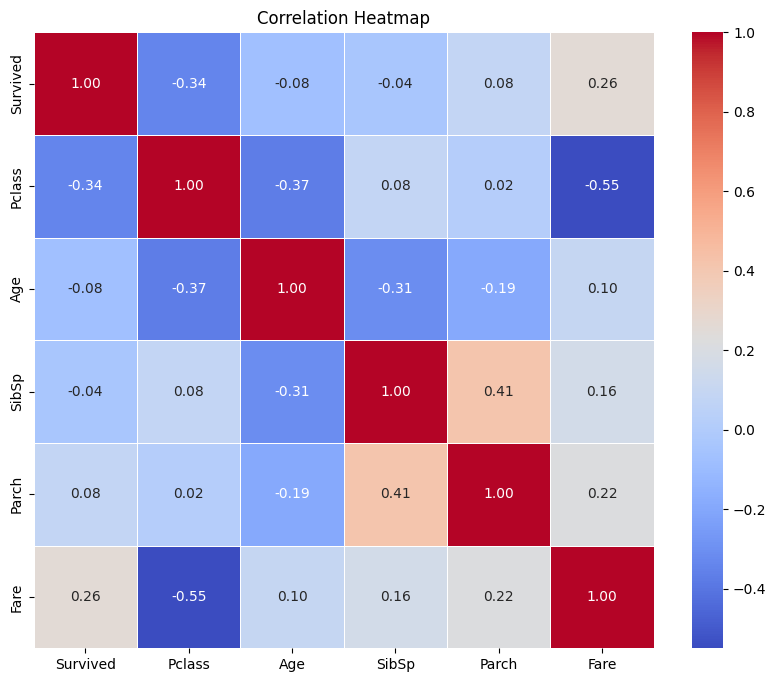

In [212]:
# Select relevant columns for correlation analysis
correlation_data = train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] ## we have established I don't trust fare anymore but for the sake of the plot, we'll keep it

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

## I'm surprised there isn't a stronger correlation between Pclass and fare - surely, 1st class tickets are more expensive? <- what started off the spiral you witness above; go back to Anna section for this 

## We can see there is a strong negative correlation between Cabin Class and Fare. There is also a moderately positive correlation between Parch and SibSp 

# Logistic regression
- we use this when y, the dependent variable, is a categorical value - in this case survival 0 or 1
- supervised classification method - creates a 0.5 boundary and therefore assigns 0 or 1 to values
- independent variables should not be strongly correlated with one another

The independent variables I will consider are Cabin Class (Pclass), Sex and Age 
- Pclass and Sex are corr 

In [209]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [210]:
## dependent variable is the survival

y = train_data.iloc[:, 1]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64